In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
import pandas as pd
url = "data/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Studying Discrete Values

In [3]:

gender = da["RIAGENDR"]
gender.value_counts()

RIAGENDR
2    2976
1    2759
Name: count, dtype: int64

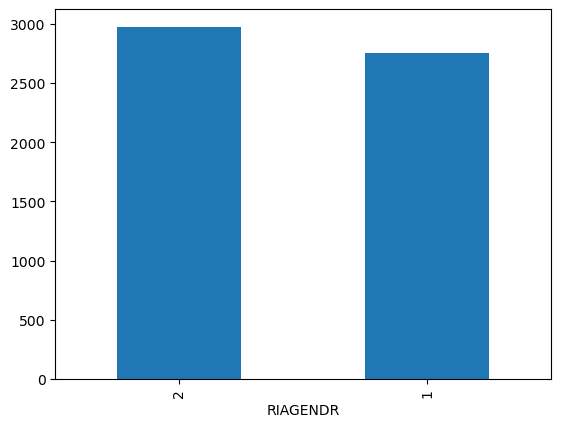

In [4]:
gender.value_counts().plot(kind="bar")
plt.show()

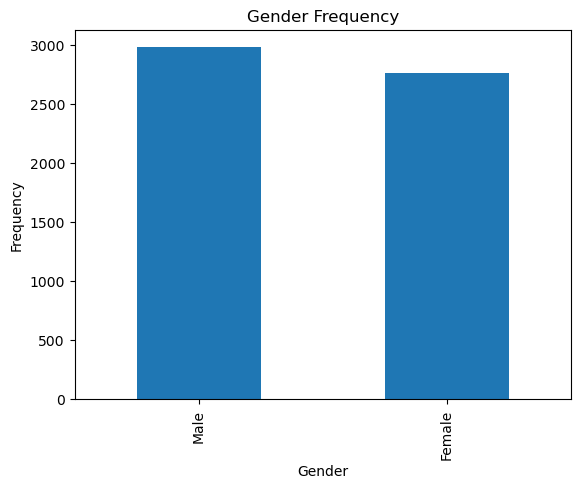

In [5]:
# Make Gender graph readable with labels 
gender.value_counts().plot(kind = 'bar')
plt.xticks([0,1],['Male','Female'])
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Gender Frequency")
plt.show()

## Most Common Value

In [6]:
sizes = np.array([22,23,29,32,39,42,42,42,42,42,42,42,42,43,44,46,51,51,55,55,57,58,78,83,97,97])

In [7]:
sizes.mean()

np.float64(49.84615384615385)

In [8]:
from collections import Counter
cnt = Counter()

for size in sizes:
    cnt[size] +=1

cnt.most_common()        # index 0 is the most common i.e, the mode

[(np.int64(42), 8),
 (np.int64(51), 2),
 (np.int64(55), 2),
 (np.int64(97), 2),
 (np.int64(22), 1),
 (np.int64(23), 1),
 (np.int64(29), 1),
 (np.int64(32), 1),
 (np.int64(39), 1),
 (np.int64(43), 1),
 (np.int64(44), 1),
 (np.int64(46), 1),
 (np.int64(57), 1),
 (np.int64(58), 1),
 (np.int64(78), 1),
 (np.int64(83), 1)]

In [9]:
#!pip install scipy

In [10]:
from scipy import stats
stats.mode(sizes)  # index 0 has value, index 1 has count

ModeResult(mode=np.int64(42), count=np.int64(8))

In [11]:
gender.mode()     # not too useful since we could have got that from the bar chart anyway

0    2
Name: RIAGENDR, dtype: int64

In [12]:
stats.mode(gender)

ModeResult(mode=np.int64(2), count=np.int64(2976))

## More than One "Classes"

In [13]:
da["HIQ210"].unique()

array([ 2., nan,  1.,  9.])

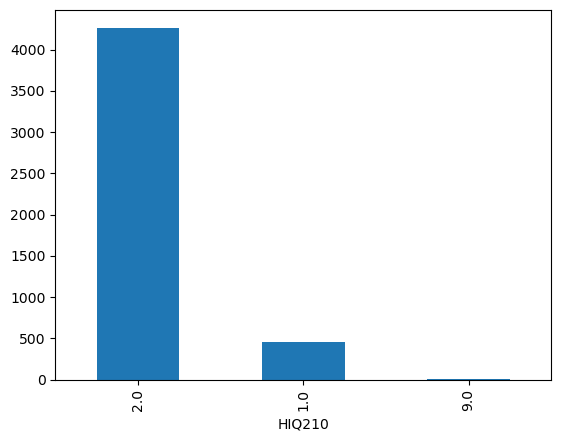

In [14]:
da["HIQ210"].value_counts().plot(kind="bar")
plt.show()

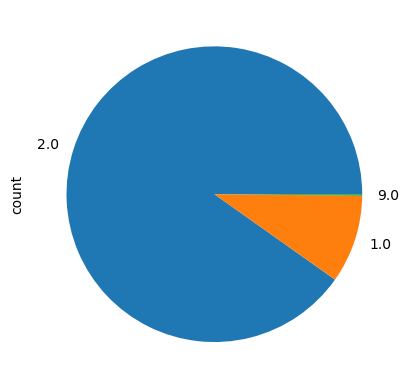

In [15]:
da["HIQ210"].value_counts().plot(kind="pie")        # highly NOT recommended!
plt.show()

## Studying Read-Valued Numbers

In [16]:
wt = da['BMXWT']

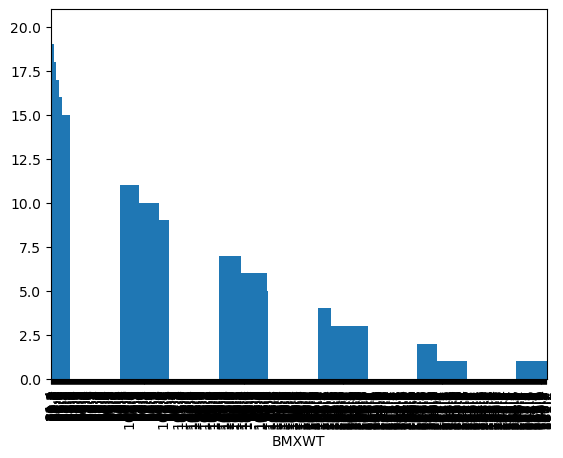

In [17]:
wt.value_counts().plot(kind='bar')          # this does not work at all
plt.show()

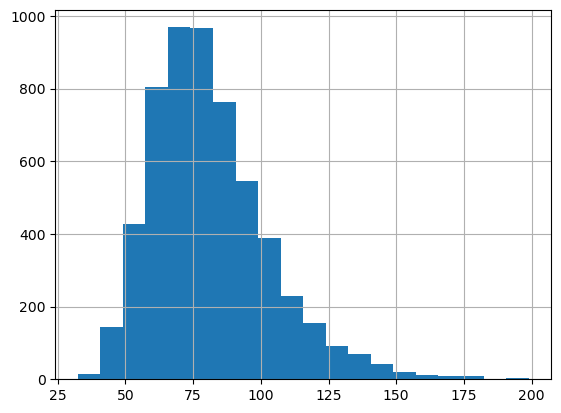

In [18]:
wt.hist(bins=20)
plt.show()


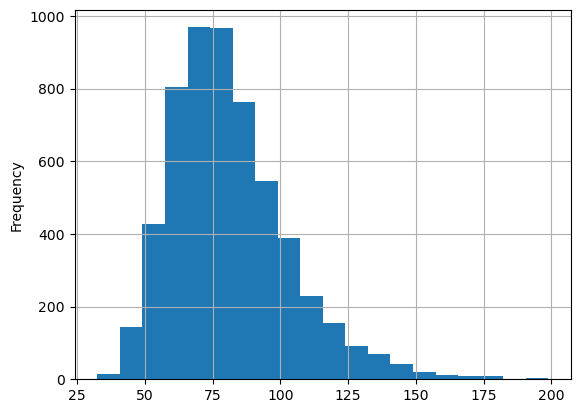

In [19]:
wt.plot(kind='hist',bins=20)# my own code
plt.grid()
plt.show()


## Custom Matplotlib Histogram

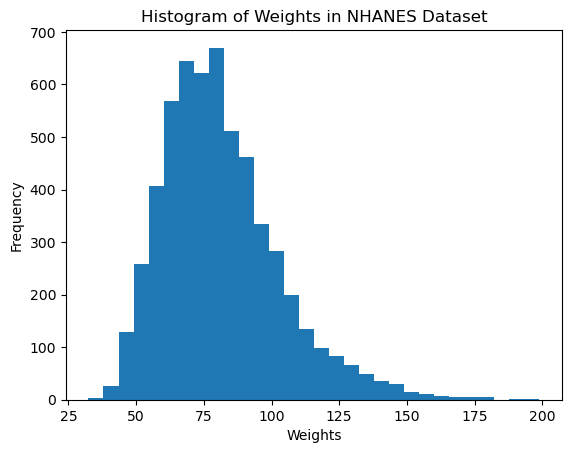

In [20]:
plt.hist(wt,bins=30)
plt.ylabel('Frequency')
plt.xlabel('Weights')
plt.title("Histogram of Weights in NHANES Dataset")
plt.show()

## Seaborn

In [21]:
#%pip install seaborn

In [22]:
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("white")    # More styling see here: https://seaborn.pydata.org/tutorial/aesthetics.html

C:\Users\User\AppData\Local\Temp\ipykernel_13184\367465353.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wt,bins=20, kde=False)


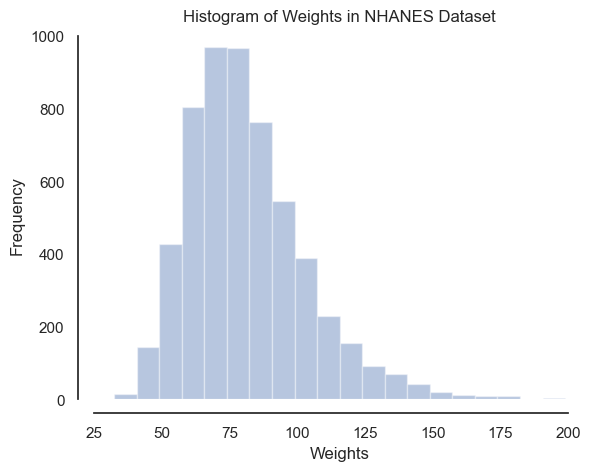

In [23]:
sns.distplot(wt,bins=20, kde=False)
plt.ylabel('Frequency')
plt.xlabel('Weights')
plt.title("Histogram of Weights in NHANES Dataset")
sns.despine(offset=10,trim=True); # move axes away
plt.show()

# Studying Central Tendency

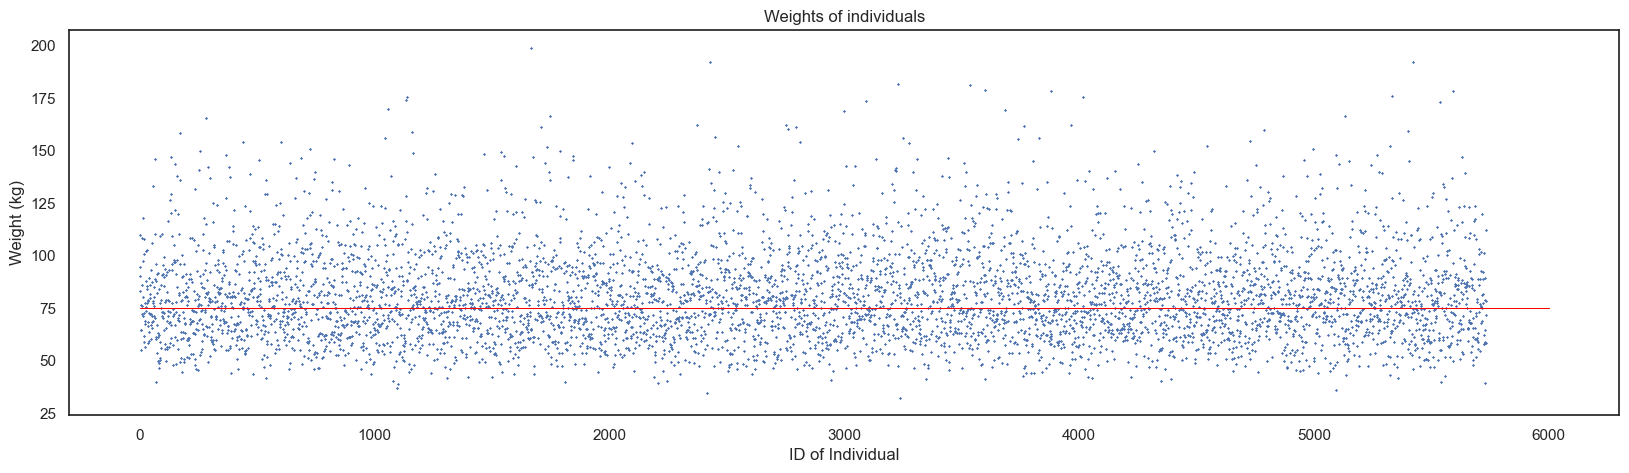

In [24]:
## Plotting Weights

# create a figure
plt.figure(figsize=(20,5))

# add a line renderer with legend and line thickness
x = range(da["BMXWT"].size)
y = da["BMXWT"]

plt.scatter(x,y,marker='x',s=0.5)

# make figure readable
plt.title("Weights of individuals")
plt.xlabel("ID of Individual")
plt.ylabel("Weight (kg)")

# plot the estimate line
p1 = (0, 75)
p2 = (6000, 75)
x_c, y_c = zip(p1, p2)
plt.plot(x_c, y_c, color="red", linewidth=0.75)
plt.show()

In [25]:
wt.mean()

np.float64(81.34267560889516)

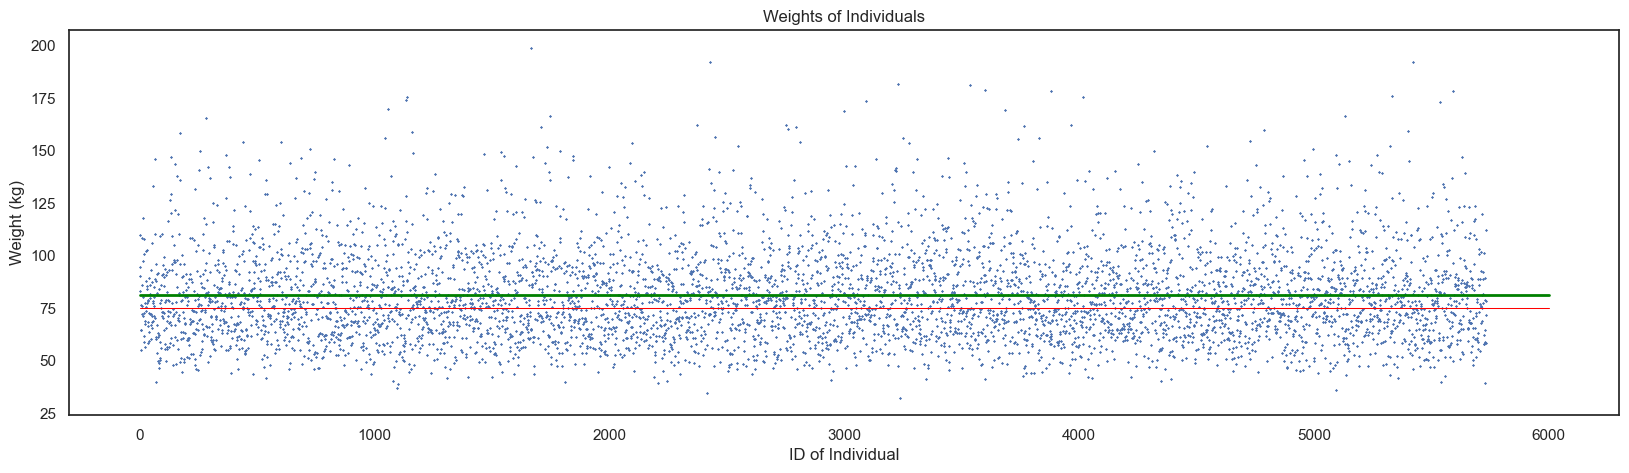

In [26]:
plt.figure(figsize=(20, 5)) 

x =  range(da['BMXWT'].size)
y =  da['BMXWT']

plt.scatter(x, y, marker='x', s=0.5)

plt.title("Weights of Individuals")
plt.xlabel("ID of Individual")
plt.ylabel("Weight (kg)")

# plot the estimate line 
x_c, y_c = ([0, 6000], [75, 75])
plt.plot(x_c, y_c, color='red', linewidth=0.75)

# plot the estimate line 
x_c, y_c = ([0, 6000], [wt.mean(), wt.mean()])
plt.plot(x_c, y_c, color='green', linewidth=2)

plt.show()

## Visualizing Weights Data 
The problem with our weights data is similar. 

In [28]:
wt.max()

198.9

In [29]:
wt.min()

32.4

In [30]:
wt.mean()

np.float64(81.34267560889516)

In [31]:
wt.median()

78.2

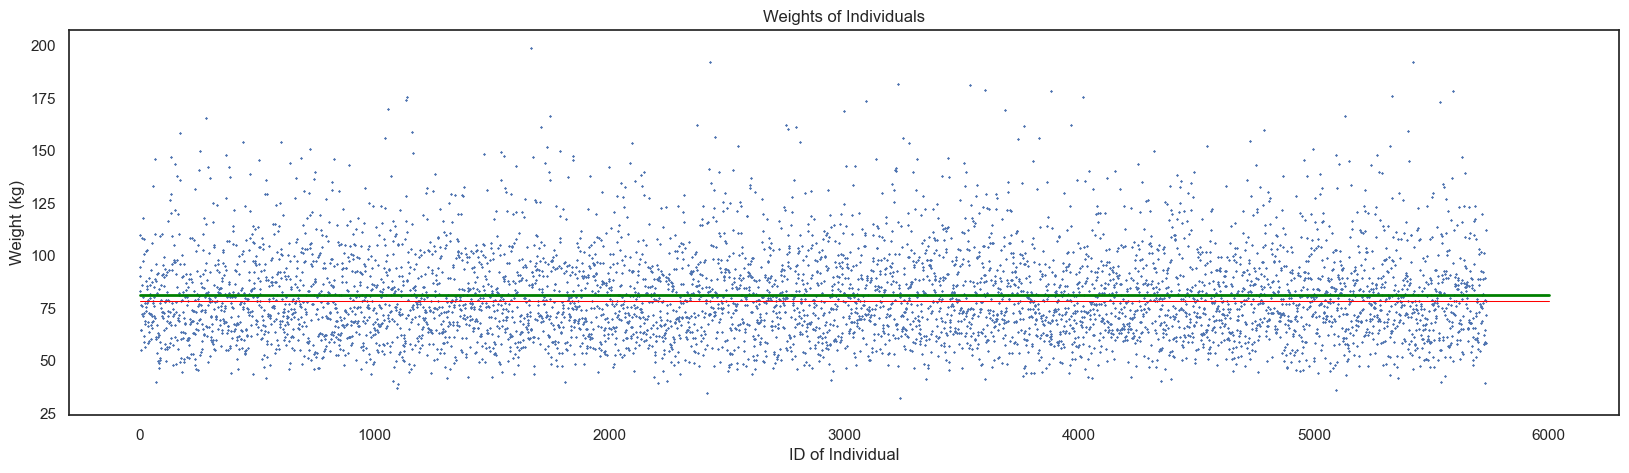

In [32]:
plt.figure(figsize=(20, 5)) 

x =  range(da['BMXWT'].size)
y =  da['BMXWT']

plt.scatter(x, y, marker='x', s=0.5)

plt.title("Weights of Individuals")
plt.xlabel("ID of Individual")
plt.ylabel("Weight (kg)")

# plot the estimate line 
x_c, y_c = ([0, 6000], [wt.median(), wt.median()])
plt.plot(x_c, y_c, color='red', linewidth=0.75)

# plot the estimate line 
x_c, y_c = ([0, 6000], [wt.mean(), wt.mean()])
plt.plot(x_c, y_c, color='green', linewidth=2)

plt.show()

### Quartiles and Boxplots 

In [33]:
nums = np.array([3, 4, 9, 17, 18, 20, 22, 23, 29, 32, 39, 42, 42, 42, 51, 97])

In [34]:
np.median(nums)

np.float64(26.0)

In [35]:
import statistics as stat

In [37]:
stat.quantiles(nums, n=4)

[np.float64(17.25), np.float64(26.0), np.float64(42.0)]

In [39]:
stat.quantiles(wt, n=4)

[43.7, 50.8, 50.1]

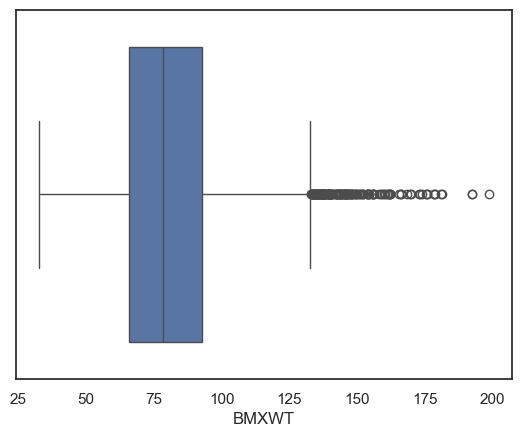

In [40]:
ax = sns.boxplot(x=wt)

In [41]:
male_wt = da.loc[da['RIAGENDR'] == 2, 'BMXWT']         
male_wt.mean()             # try .mean() 

np.float64(76.51676280963693)

In [42]:
female_wt = da.loc[da['RIAGENDR'] == 1, 'BMXWT']         
female_wt.mean()             # try .mean() 

np.float64(86.57326222876058)

C:\Users\User\AppData\Local\Temp\ipykernel_13184\660086106.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(  x = "RIAGENDR", y = "BMXWT", data=da , palette="Set3")


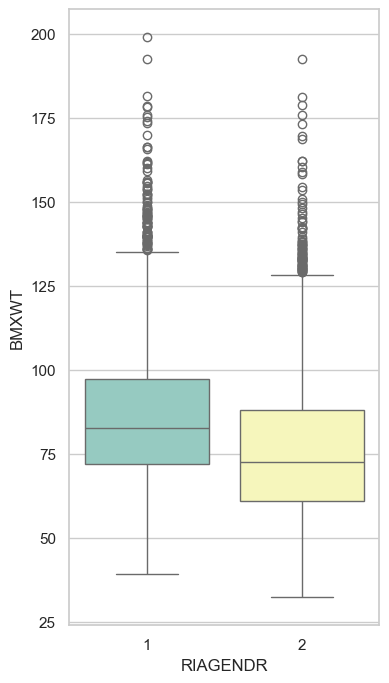

In [44]:
# But there's an easier way 
plt.figure(figsize=(4,8))
sns.set_style("whitegrid") 

ax = sns.boxplot(  x = "RIAGENDR", y = "BMXWT", data=da , palette="Set3")

C:\Users\User\AppData\Local\Temp\ipykernel_13184\1389517114.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(  x = "HIQ210", y = "BMXWT",  data=da, palette="Set3")


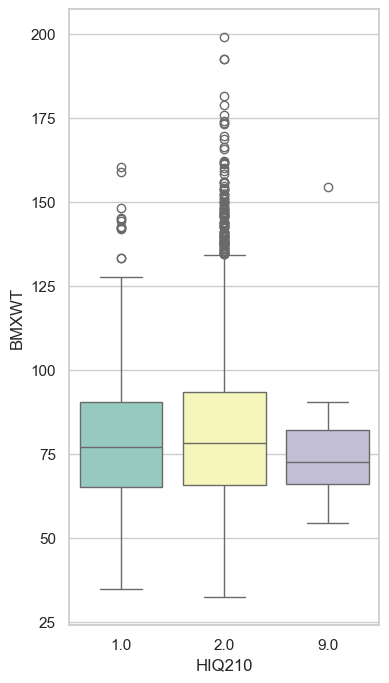

In [45]:
# But there's an easier way 
plt.figure(figsize=(4,8))
sns.set_style("whitegrid") 


ax = sns.boxplot(  x = "HIQ210", y = "BMXWT",  data=da, palette="Set3")